In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt

## Visualizing the gap across STEAM fields

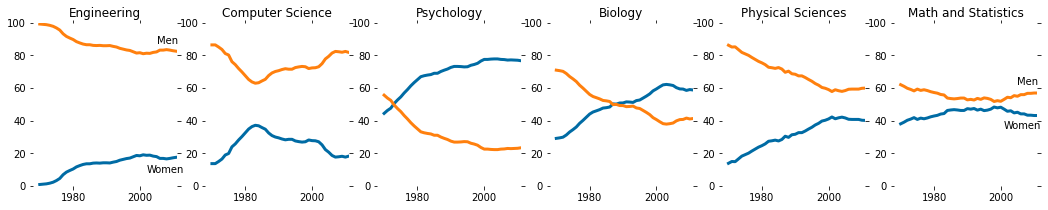

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

## Visualizing the gap in all degrees

In [3]:
# Creates categories lists
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

In [4]:
def remove_spines_and_tick_params(ax):
    
    for spine_key in ax.spines.keys():
        ax.spines[spine_key].set_visible(False)
    
    ax.tick_params(labelbottom='off')    
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    return ax
    

In [7]:
def add_horizontal_line(ax):
    light_gray = (171/255, 171/255, 171/255)
    ax.axhline(50, c=light_gray, alpha=0.3)
    return ax

In [8]:
def add_plot_from_categories_list(categories_list, index, sp):
    ax = fig.add_subplot(6, 3, sp + 1)
    
    ax.plot(women_degrees['Year'], women_degrees[categories_list[index]], 
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[categories_list[index]],
            c=cb_orange, label='Men', linewidth=3)
    
    ax = remove_spines_and_tick_params(ax)
    ax = add_horizontal_line(ax)
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
    ax.set_title(categories_list[index])
    return ax

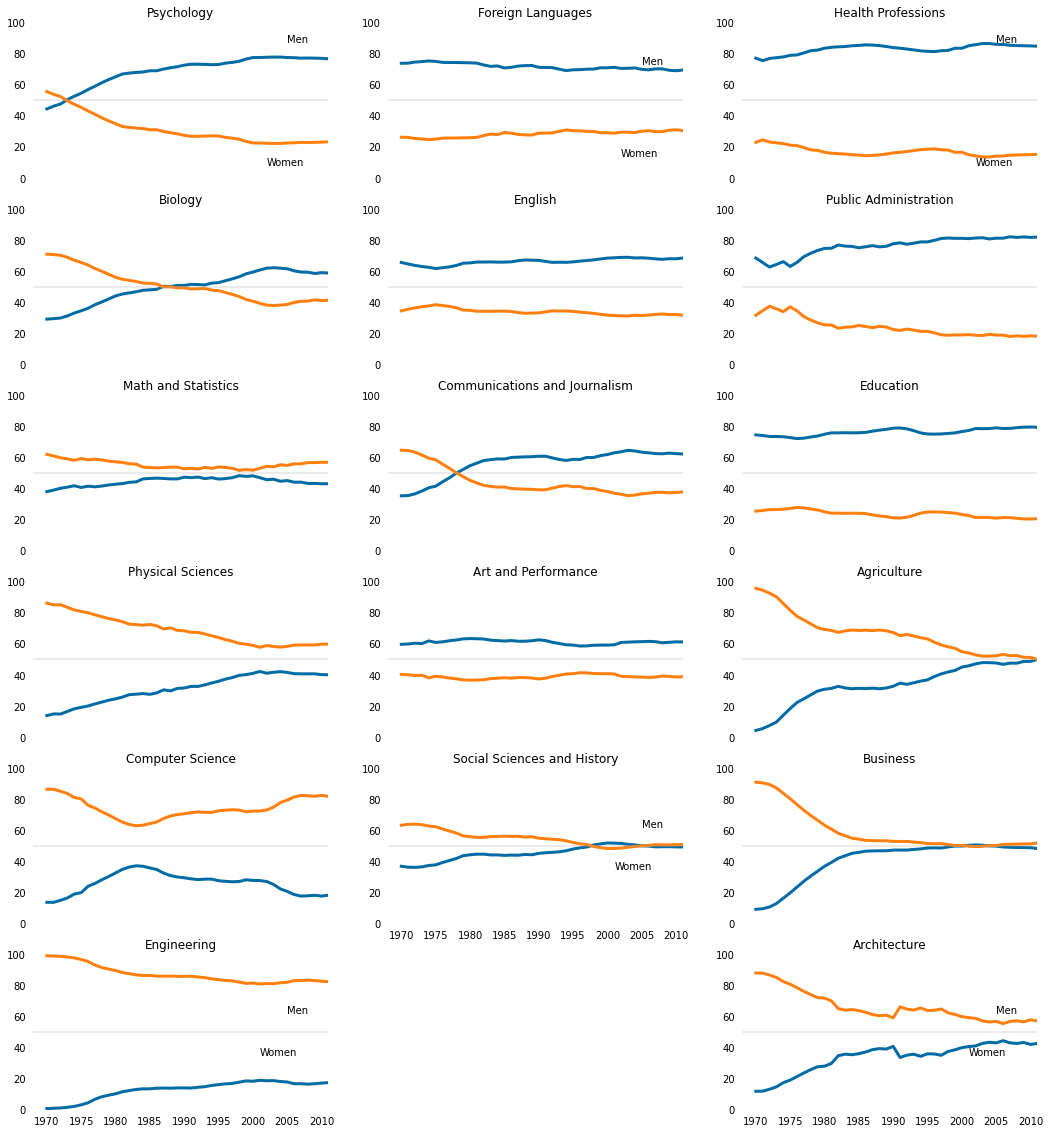

In [10]:
fig = plt.figure(figsize=(18, 20))

# Creates charts for steam_cats list
for sp in range(0,18,3):
    
    index = int(sp/3)            
    ax = add_plot_from_categories_list(stem_cats, index, sp) 
    
    if index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
        #ax.legend(loc='best')
    elif index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')        
        ax.tick_params(labelbottom=True) 
    
# Creates charts for lib_arts_cats list   
for sp in range(1,16,3):
    
    index = int(sp/3)            
    ax = add_plot_from_categories_list(lib_arts_cats, index, sp)  
  
    if index == 0:
        ax.text(2005, 73, 'Men')
        ax.text(2002, 14, 'Women')
        #ax.legend(loc='best')
    elif index == 4:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')        
        ax.tick_params(labelbottom=True)
        
# Creates charts for lib_arts_cats list   
for sp in range(2,18,3):
    
    index = int(sp/3)            
    ax = add_plot_from_categories_list(other_cats, index, sp)    
  
    if index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
        #ax.legend(loc='best')
    elif index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')        
        ax.tick_params(labelbottom=True)
    
    
    
plt.savefig("gender_degrees.png")            